In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
with open('/Users/ivanskv/Documents/GitHub/moscow-infringements/data.csv', 'r') as f:
  d = pd.read_csv(f, sep = ';')

In [3]:
d.drop('Unnamed: 13', axis = 1, inplace = True)

In [4]:
d.head()

,ID,ReportDate,TotalInfringementsAmount,global_id,SpeedLimitInfringementsAmount,BusLaneOffenceAmount,TTKOffenceAmount,ParkingOffenceAmount,FormalizedTotalInfringements,FormalizedSpeedLimitInfringementsAmount,FormalizedBusLaneOffenceAmount,FormalizedTTKOffenceAmount,FormalizedParkingOffenceAmount
0,20,20.01.2013,5374,1726857,2953,0,0,1789,2440,2105,0,0,335
1,21,21.01.2013,25312,1726858,560,18851,0,4709,1551,317,50,0,1184
2,22,22.01.2013,29132,1726859,1153,20724,0,5976,2672,659,609,0,1404
3,23,23.01.2013,27909,1726860,1489,18786,0,6380,4061,1031,1064,0,1966
4,24,24.01.2013,29952,1726861,1239,19982,0,7436,2952,561,534,0,1857


In [5]:
d.ReportDate = pd.to_datetime(d.ReportDate, format = "%d.%m.%Y")
d['Infringements_norm'] = (d.TotalInfringementsAmount - d.TotalInfringementsAmount.min()) / (d.TotalInfringementsAmount.max() - d.TotalInfringementsAmount.min())
d = d[d.ReportDate.dt.year != 2020]

In [6]:
d.head()

,ID,ReportDate,TotalInfringementsAmount,global_id,SpeedLimitInfringementsAmount,BusLaneOffenceAmount,TTKOffenceAmount,ParkingOffenceAmount,FormalizedTotalInfringements,FormalizedSpeedLimitInfringementsAmount,FormalizedBusLaneOffenceAmount,FormalizedTTKOffenceAmount,FormalizedParkingOffenceAmount,Infringements_norm
0,20,2013-01-20,5374,1726857,2953,0,0,1789,2440,2105,0,0,335,0.005007
1,21,2013-01-21,25312,1726858,560,18851,0,4709,1551,317,50,0,1184,0.023585
2,22,2013-01-22,29132,1726859,1153,20724,0,5976,2672,659,609,0,1404,0.027144
3,23,2013-01-23,27909,1726860,1489,18786,0,6380,4061,1031,1064,0,1966,0.026005
4,24,2013-01-24,29952,1726861,1239,19982,0,7436,2952,561,534,0,1857,0.027908


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2527 entries, 0 to 2526
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   ID                                       2527 non-null   int64         
 1   ReportDate                               2527 non-null   datetime64[ns]
 2   TotalInfringementsAmount                 2527 non-null   int64         
 3   global_id                                2527 non-null   int64         
 4   SpeedLimitInfringementsAmount            2527 non-null   int64         
 5   BusLaneOffenceAmount                     2527 non-null   int64         
 6   TTKOffenceAmount                         2527 non-null   int64         
 7   ParkingOffenceAmount                     2527 non-null   int64         
 8   FormalizedTotalInfringements             2527 non-null   int64         
 9   FormalizedSpeedLimitInfringementsAmount  

In [8]:
test = d[(d.ReportDate.dt.year == 2016) & (d.ReportDate.dt.month == 6)][['ReportDate', 'TotalInfringementsAmount']]


In [9]:
test['TotalInfringementsAmount'] = (test.TotalInfringementsAmount - test.TotalInfringementsAmount.min()) / (test.TotalInfringementsAmount.max() - test.TotalInfringementsAmount.min())

In [10]:
test['weekday'] = test.ReportDate.dt.weekday 
test['week'] = test.ReportDate.dt.week - np.min(test.ReportDate.dt.week)
test.head()

,ReportDate,TotalInfringementsAmount,weekday,week
1218,2016-06-01,0.779505,2,0
1219,2016-06-02,0.471186,3,0
1220,2016-06-03,0.911130,4,0
1221,2016-06-04,0.303765,5,0
1222,2016-06-05,0.816421,6,0


In [11]:
palette = sns.color_palette("GnBu_d", 256)

In [12]:
def value_to_color(val):
    ind = int(val * (256 - 1)) # target index in the color palette
    return palette[ind]

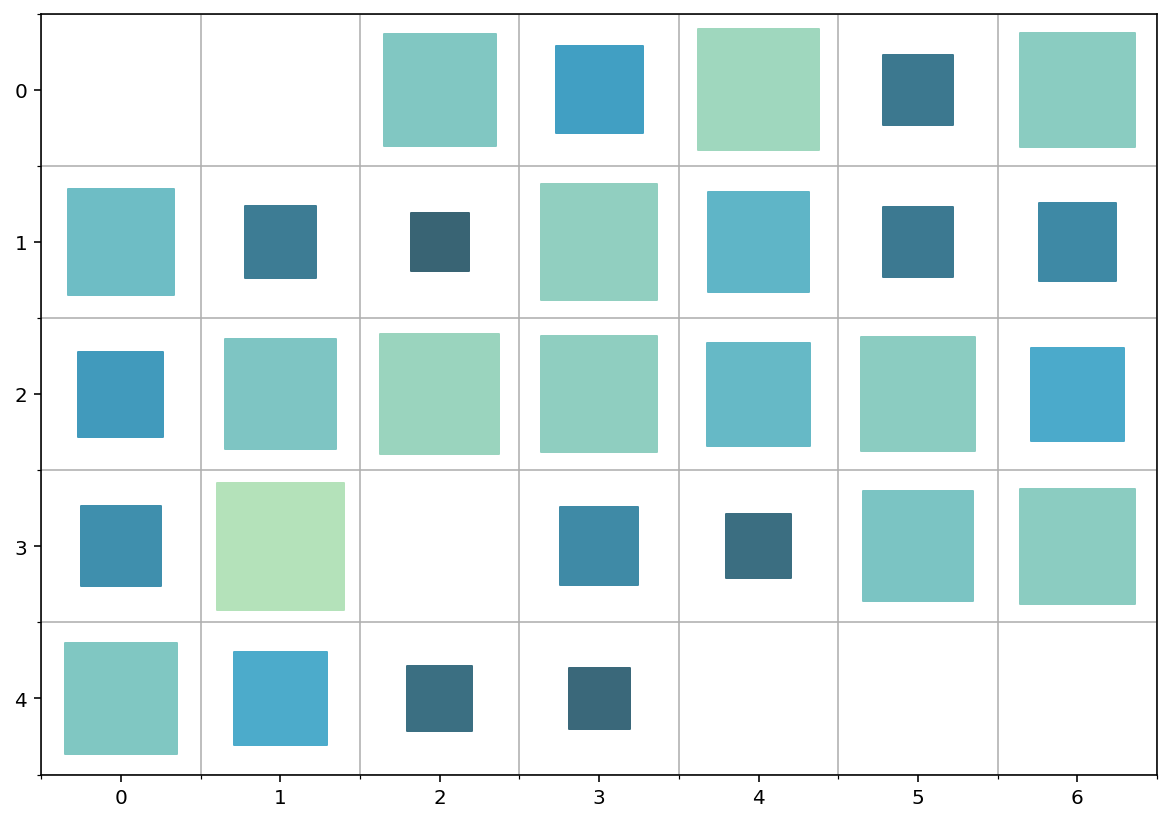

In [13]:
fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(x = test.weekday, y = test.week, s = test.TotalInfringementsAmount * 4000, marker = 's', c = test.TotalInfringementsAmount.apply(value_to_color))

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
ax.set_xlim([-0.5, test.weekday.max() + 0.5]) 
ax.set_ylim([-0.5, test.week.max() + 0.5])

plt.gca().invert_yaxis()

plt.show()

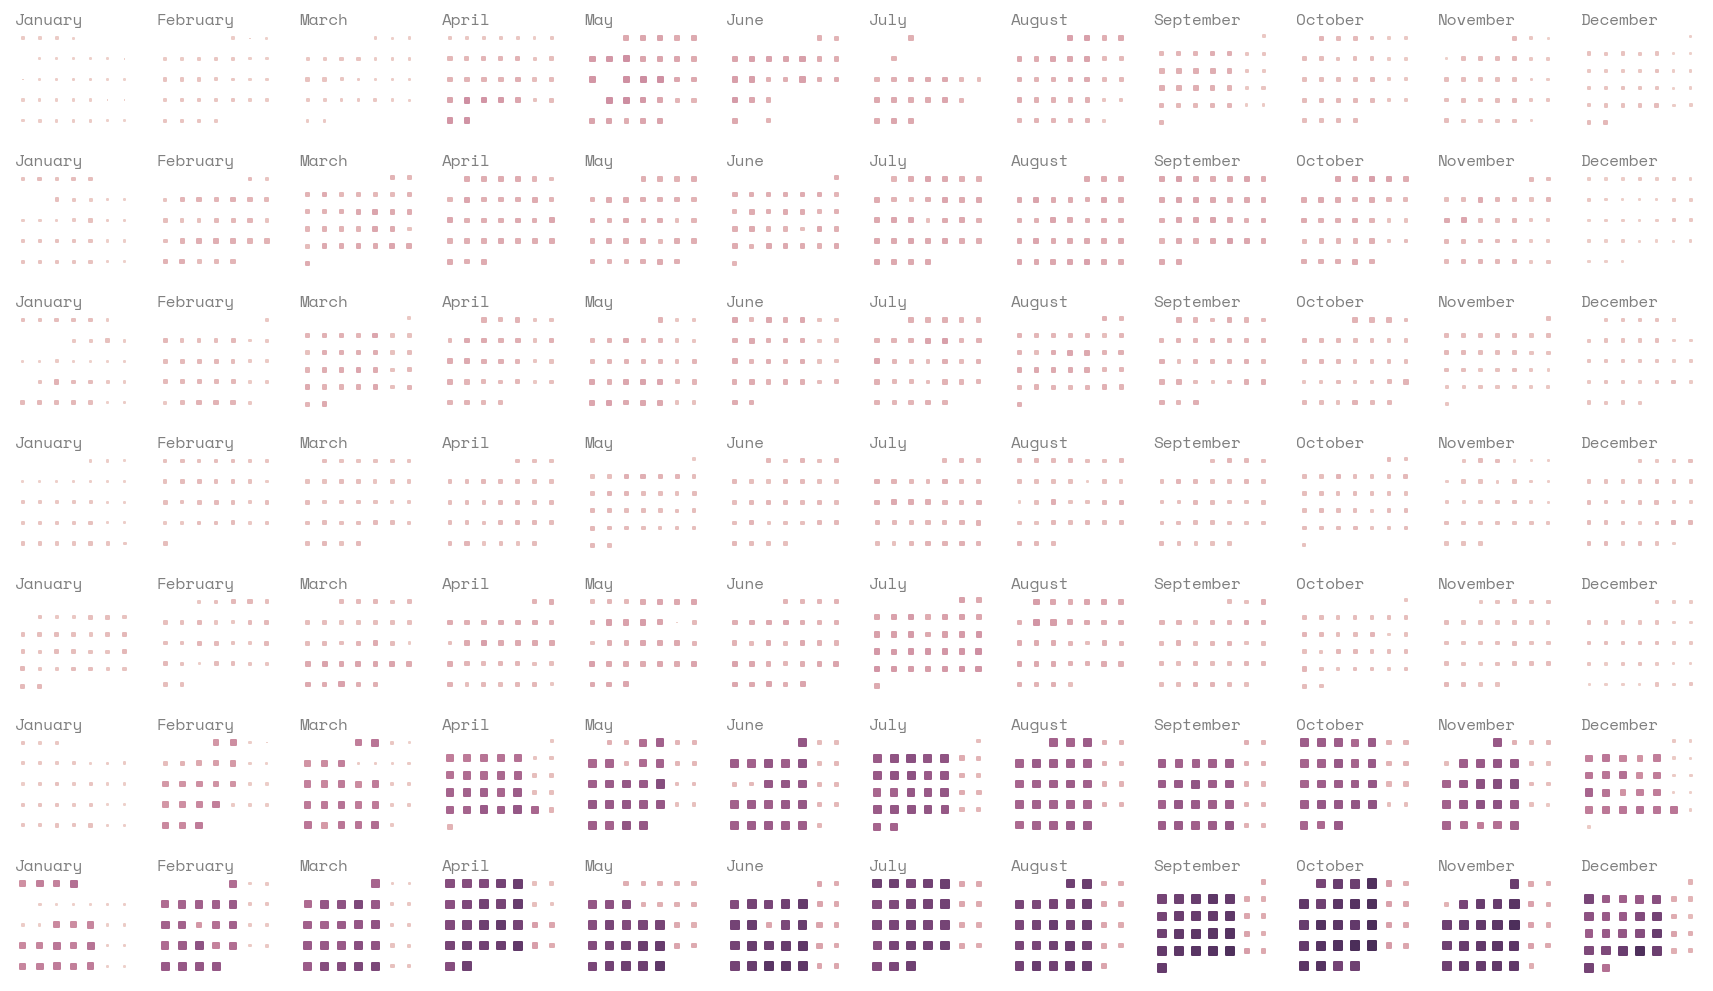

In [24]:
fig = plt.figure(figsize=(12, 7))
outer = fig.add_gridspec(7, 1, hspace = 2.5)


palette = sns.cubehelix_palette(256)#sns.color_palette("GnBu_d", 256)

def value_to_color(val):
    ind = int(val * (256 - 1)) # target index in the color palette
    return palette[ind]

for i, year in enumerate(d.ReportDate.dt.year.unique()):
    
    inner = outer[i].subgridspec(1, 12)

    for j in range(12):
        current = d[(d.ReportDate.dt.year == year) & (d.ReportDate.dt.month == j+1)][['ReportDate', 'Infringements_norm']]
        current['weekday'] = current.ReportDate.dt.weekday 
        if j+1 == 1:
            current['week'] = current.ReportDate.dt.week.replace({np.max(current.ReportDate.dt.week) : 0})

        elif j+1 == 12:
            week_fix = current.ReportDate.dt.week.replace({1 : np.max(current.ReportDate.dt.week) + 1})
            current['week'] = week_fix - np.min(week_fix)

        else:
            current['week'] = current.ReportDate.dt.week - np.min(current.ReportDate.dt.week)

        ax = fig.add_subplot(inner[j])
        ax.scatter(x = current.weekday, y = current.week, s = current.Infringements_norm * 20, marker = 's', c = current.Infringements_norm.apply(value_to_color))

        ax.grid(False, 'major')
        ax.grid(False, 'minor')

        ax.set_xticks([], [])
        ax.set_yticks([], [])

        ax.set_xlim([-0.5, current.weekday.max() + 0.5]) 
        ax.set_ylim([-0.5, current.week.max() + 0.5])

        #if i == 0:
        ax.set_title('{}'.format(current.ReportDate.dt.month_name().iloc[0]), loc = 'left', pad = -0.4, fontdict = {
            'fontsize': 8,
            'color' : 'gray',
            'fontfamily' : 'Space Mono',
            'fontweight' : 3,
            'verticalalignment': 'baseline'})
        
        ax.axis('off')
        plt.gca().invert_yaxis()
        fig.add_subplot(ax)


outer.tight_layout(fig)

plt.box(False)
plt.show()

In [17]:
import matplotlib.font_manager as font_manager; font_manager._rebuild()

In [16]:
#font_manager.findSystemFonts(fontpaths=None, fontext='ttf')